In [1]:
################################################
# Initial consistency check of .csv files 
#       considering the CSI timestamps         #
################################################

import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath


lent=[]
tmin=[]
tsamp=[]

NS = 4      # Number of Sensors
N10s = 52   # CYCLE = 400 ms 
B10s = 13   # 13 Broadcasts for image -> 26x26 (Real + Im)

for ex in range(6):

    if ex==0: file_in = 'cEu_rot1_06022025.csv'    
    if ex==1: file_in = 'cEu_rot2_06022025.csv'  
    if ex==2: file_in = 'cEu_rot3_06022025.csv'    
    if ex==3: file_in = 'cEu_rot4_06022025.csv'    
    if ex==4: file_in = 'cEu_rot5_06022025.csv'    
    if ex==5: file_in = 'cEu_rot6_06022025.csv'    
    # if ex==6: file_in = 'cEu_rot7_01022025.csv'    
    # if ex==7: file_in = 'cEu_rot8_01022025.csv'    
    # if ex==8: file_in = 'cEu_rot9_01022025.csv'    
    # if ex==9: file_in = 'cEu_rot10_01022025.csv'        
       
    

    file_out = 'data/f'+file_in
    file_in = 'data/'+file_in

    # Assumes first 6 lines are correct. Further missing Lines: Will copy from last valid CSI 

    t=[]
    sens = []
    dt = []
    tin = []
    
    contLin = 0
    with open(file_in, "r", newline='') as f_input:
        reader = csv.reader(f_input)
        lines = list(reader)
        for row in lines:
            #print(file_in,contLin)
            contLin=contLin+1
            
            sens.append(row[1])
            t.append(float(row[13]))
            dt.append(float(row[14]))
            tin.append(float(row[15]))

    t=np.array(t)
    dt=np.array(dt)            
    print('\nOutlyers in',file_in,'len(t):',len(t),'{:.3f} ms'.format(t[len(t)-1]),'tmax/len:{:.3f} ms;'.format(t[len(t)-1]/len(t)), 
          'mean(dt) {:.3f} ms;'.format(np.mean(dt)),'min/max(dt)','{:.3f};'.format(np.min(dt)),'{:.3f};'.format(np.max(dt)))             
    
    #print('CSI\t dt_rxM\t    sensor\t time')
    #for i in range(len(t)):            
    #    if dt[i] > 135:
    #        print(i, '\t{:.3f} ms;\t'.format(dt[i]), sens[i], '\t{:.3f} ms;'.format(t[i]))

    print('CSI\t tin_cycle\t sensor \ttime  \tdt  \tmin(tin):',np.min(tin),'max(tin):',np.max(tin))
    for i in range(len(t)):            
        # if tin[i] > 215:  #NS=2
        if tin[i] > 523:    #NS=6
            print(i, '\t{:.3f} ms;\t'.format(tin[i]), sens[i], '\t{:.3f} ms;'.format(t[i]),'\t{:.3f} ms;'.format(dt[i]))



Outlyers in data/cEu_rot1_06022025.csv len(t): 1638 257604.853 ms tmax/len:157.268 ms; mean(dt) 399.499 ms; min/max(dt) 103.281; 2816.778;
CSI	 tin_cycle	 sensor 	time  	dt  	min(tin): 17.225 max(tin): 314.298

Outlyers in data/cEu_rot2_06022025.csv len(t): 1745 257693.310 ms tmax/len:147.675 ms; mean(dt) 353.862 ms; min/max(dt) 26.201; 1779.750;
CSI	 tin_cycle	 sensor 	time  	dt  	min(tin): 15.582 max(tin): 311.213

Outlyers in data/cEu_rot3_06022025.csv len(t): 1676 258467.795 ms tmax/len:154.217 ms; mean(dt) 355.981 ms; min/max(dt) 99.393; 1570.040;
CSI	 tin_cycle	 sensor 	time  	dt  	min(tin): 15.633 max(tin): 311.856

Outlyers in data/cEu_rot4_06022025.csv len(t): 1558 258866.729 ms tmax/len:166.153 ms; mean(dt) 400.585 ms; min/max(dt) 94.298; 2730.300;
CSI	 tin_cycle	 sensor 	time  	dt  	min(tin): 15.417 max(tin): 315.68

Outlyers in data/cEu_rot5_06022025.csv len(t): 1649 257227.776 ms tmax/len:155.990 ms; mean(dt) 397.609 ms; min/max(dt) 66.363; 2040.638;
CSI	 tin_cycle	 senso

In [2]:
################################################
# Insert lines to fullfill the standard sequence
#       considering the CSI timestamps         #
################################################
import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath


lent=[]
tmin=[]
tsamp=[]

NS = 4      # Number of Sensors
N10s = 52   # CYCLE = 400 ms 
B10s = 13   # 13 Broadcasts for image -> 26x26 (Real + Im)

for ex in range(6):

    if ex==0: file_in = 'cEu_rot1_06022025.csv'    
    if ex==1: file_in = 'cEu_rot2_06022025.csv'  
    if ex==2: file_in = 'cEu_rot3_06022025.csv'    
    if ex==3: file_in = 'cEu_rot4_06022025.csv'    
    if ex==4: file_in = 'cEu_rot5_06022025.csv'    
    if ex==5: file_in = 'cEu_rot6_06022025.csv'  
    
    file_out = 'data/f'+file_in
    file_in = 'data/'+file_in

    # Assumes first lines are correct. Missing Lines: Will copy from last valid CSI 

    t=[]
    sens = []
    dt = []
    tin = []
    tCSI1 = []
    tCSI2 = []
    tdma = []
    with open(file_in, "r", newline='') as f_input:
        reader = csv.reader(f_input)
        lines = list(reader)
        for row in lines:
            sens.append(row[1])
            t.append(float(row[13]))
            dt.append(float(row[14]))
            tin.append(float(row[15]))
            tCSI1.append(float(row[10]))
            tCSI2.append(float(row[11]))
            tdma.append(float(row[12]))
        

    seq=['6','7','8','9']

    seq=seq[0:NS]
    
    #print('file_in:',file_in,'# Lines:',len(t),'max t:',t(len(t)))
    print('file_in:',file_in,'# Lines:',len(t),'max t:,t[len(t)]')

    sq=np.array(seq)
    se=list(sens)  
    incycle=[]
    cIns=0       # count Insertions
    cDel=0
    
    rrr=NS*int(len(t)//NS)
    print(rrr,len(t))
    delList=list([])
#    del lines[0:6]
    for j in range(NS,rrr,NS):          # remove "late" CSI lines
        for i in range (NS): 
            tol1 = t[j] - tCSI1[i+j]
            tol2 = t[j] - tCSI2[i+j]
            tol3 = tdma[i+j] - 100*i -20
            #if tol1 > 750 or tol2 > 750 or tol3 > 500 :
            #if tol1 > 750 or tol2 > 750 or tol3 > 500 :
            if tol1 > 750 or tol2 > 750 or tol3 > 240 :
                print('line',i+j,'S',sens[i+j],'\ttCSI1:',tCSI1[i+j],'\ttCSI2:',
                      tCSI2[i+j],'\tt',t[j],'\ttol1:{:.2f}'.format(tol1),'\ttol2:{:.2f}'.format(tol2),'\ttol3:{:.2f}'.format(tol3))
                
                print('i+j, len(t)',i+j, int(len(t)))
                if i+j in lines: lines.remove(lines[i+j])
                    
                delList=np.append(delList,int(i+j))
                cDel+=1
        #       print('cIns:',cIns,i,se[i-1:i],seq[incycle])
    print('file_in:',file_in,'Lines removed:',cDel)

    #delList = list(np.int(delList))
    #del lines[delList]


    with open(file_out, "w", newline='') as f_output:
        writer = csv.writer(f_output)
        writer.writerows(lines)

    f_input.close()
    f_output.close()
    
    print(' ')

file_in: data/cEu_rot1_06022025.csv # Lines: 1638 max t:,t[len(t)]
1636 1638
line 8 S 9 	tCSI1: 1424.745 	tCSI2: 1432.672 	t 1854.27 	tol1:429.53 	tol2:421.60 	tol3:261.20
i+j, len(t) 8 1638
line 12 S 9 	tCSI1: 1819.81 	tCSI2: 1820.987 	t 2244.04 	tol1:424.23 	tol2:423.05 	tol3:263.99
i+j, len(t) 12 1638
line 28 S 9 	tCSI1: 3764.761 	tCSI2: 3770.989 	t 4194.48 	tol1:429.72 	tol2:423.49 	tol3:263.68
i+j, len(t) 28 1638
line 31 S 9 	tCSI1: 4154.761 	tCSI2: 4551.11 	t 4194.48 	tol1:39.72 	tol2:-356.63 	tol3:353.77
i+j, len(t) 31 1638
line 56 S 9 	tCSI1: 8445.99 	tCSI2: 8452.204 	t 8874.29 	tol1:428.30 	tol2:422.09 	tol3:262.95
i+j, len(t) 56 1638
line 60 S 9 	tCSI1: 8834.771 	tCSI2: 8840.994 	t 9264.251 	tol1:429.48 	tol2:423.26 	tol3:263.88
i+j, len(t) 60 1638
line 100 S 9 	tCSI1: 14298.326 	tCSI2: 14301.646 	t 14724.98 	tol1:426.65 	tol2:423.33 	tol3:263.81
i+j, len(t) 100 1638
line 144 S 7 	tCSI1: 18587.63 	tCSI2: 19763.719 	t 20000.609 	tol1:1412.98 	tol2:236.89 	tol3:80.33
i+j, len(t

In [3]:

################################################
# Insert lines to fullfill the standard sequence
################################################
################################################
import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath


lent=[]
tmin=[]
tsamp=[]

NS = 6
NS = 4   # Number of Sensors

N10s = 158   # 221 => 158 CSI Lines == 10 s 
N10s = 52

for ex in range(6):

    if ex==0: file_in = 'cEu_rot1_06022025.csv'    
    if ex==1: file_in = 'cEu_rot2_06022025.csv'  
    if ex==2: file_in = 'cEu_rot3_06022025.csv'    
    if ex==3: file_in = 'cEu_rot4_06022025.csv'    
    if ex==4: file_in = 'cEu_rot5_06022025.csv'    
    if ex==5: file_in = 'cEu_rot6_06022025.csv'  
    
    file_out = 'data/f'+file_in
    file_in = 'data/'+file_in
    # Assumes first lines are correct. Missing Lines: Will copy from last valid CSI 

    t=[]
    sens = []
    with open(file_in, "r", newline='') as f_input:
        reader = csv.reader(f_input)
        lines = list(reader)
        for row in lines:
            t.append(float(row[13]))
            sens.append(row[1])
        #lines.insert(5,lines[10])
        

    seq=['6','7','8','9']

    seq=seq[0:NS]

    sq=np.array(seq)
    se=list(sens)  
    incycle=[]
    cIns=0       # count Insertions

    #print('t[0:10]',t[0:10])
    for i in range(len(t)):
        incycle = i % NS 
        if se[i] != seq[incycle]:
            lines.insert(i,lines[i-NS])
            i = i-1
            se.insert(i,seq[incycle])
            cIns+=1
    #       print('cIns:',cIns,i,se[i-1:i],seq[incycle])
    print('file_in:',file_in,'Line insertions in the 1st run:',cIns)

    i=cIns
    staL = 0
    endL = len(t)
    nIns=cIns

    while cIns > 0 or nIns > 0:        # Proceed because cCins lines where inserted! 
        staL = endL
        endL = endL + nIns
        cIns = nIns
        nIns = 0

        #print('=======> First pass of len(t) processed') 
        #print(' ')
        for i in range (staL,endL):
            incycle = i % NS 
            if se[i] != seq[incycle]:
                lines.insert(i,lines[i-NS])
                i = i-1
                se.insert(i,seq[incycle])
                nIns+=1
#                print('cIns:',cIns,'nIns:',nIns,i,se[i-1:i],seq[incycle])
            cIns-=1
        print('file:',file_in,'Line insertions in the next run, cIns:',cIns,'new insertions nIns:',nIns)


    with open(file_out, "w", newline='') as f_output:
        writer = csv.writer(f_output)
        writer.writerows(lines)

    f_input.close()
    f_output.close()
    
    print(' ')



file_in: data/cEu_rot1_06022025.csv Line insertions in the 1st run: 345
file: data/cEu_rot1_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 53
file: data/cEu_rot1_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 5
file: data/cEu_rot1_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 2
file: data/cEu_rot1_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 0
 
file_in: data/cEu_rot2_06022025.csv Line insertions in the 1st run: 380
file: data/cEu_rot2_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 92
file: data/cEu_rot2_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 18
file: data/cEu_rot2_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 5
file: data/cEu_rot2_06022025.csv Line insertions in the next run, cIns: 0 new insertions nIns: 0
 
file_in: data/cEu_rot3_06022025.csv Line insertions in the 1st run: 438
f

In [4]:

# count lines before and after CSI line insertions

for ex in range(6):

    if ex==0: file_in = 'cEu_rot1_06022025.csv'    
    if ex==1: file_in = 'cEu_rot2_06022025.csv'  
    if ex==2: file_in = 'cEu_rot3_06022025.csv'    
    if ex==3: file_in = 'cEu_rot4_06022025.csv'    
    if ex==4: file_in = 'cEu_rot5_06022025.csv'    
    if ex==5: file_in = 'cEu_rot6_06022025.csv'  
    
    file_ins = 'data/f'+file_in
    file_in = 'data/'+file_in
    

    t=[]
    ti=[]
    sens = []
    sensi= []
    
    with open(file_in, "r", newline='') as f_input:
        reader = csv.reader(f_input)
        lines = list(reader)
        for row in lines:
            t.append(float(row[13]))
            sens.append(row[1])

    with open(file_ins, "r", newline='') as f_insput:
        reader = csv.reader(f_insput)
        lines = list(reader)
        for row in lines:
            ti.append(float(row[13]))
            sensi.append(row[1])

    print(file_in,'len(t):',len(t),file_ins,'len(ti):',len(ti), '+:{:.3f}%'.format(100*(len(ti)-len(t))/len(t) ))   


    f_input.close()
    f_insput.close()
    
    
        #75.4970562162162
    print('len(t)',len(t) ,t[-1]/1000/60,'min, cycle_time [ms]',NS*(t[-1]-t[0])/len(t))
    print('len(ti)',len(ti) ,ti[-1]/1000/60,'min, cycle_time [ms]',NS*(ti[-1]-ti[0])/len(ti))
    
#    lent.append(len(t))
#    tmin.append(t[-1]/1000/60)
#    tsamp.append(NS*(t[-1]-t[0])/len(t))

#    print('len(t)',lent ,'tmin',tmin,'tsamp',tsamp)   

    print(' ')


data/cEu_rot1_06022025.csv len(t): 1638 data/fcEu_rot1_06022025.csv len(ti): 2043 +:24.725%
len(t) 1638 4.293414216666666 min, cycle_time [ms] 627.0925665445666
len(ti) 2043 4.293414216666666 min, cycle_time [ms] 502.7790621634851
 
data/cEu_rot2_06022025.csv len(t): 1745 data/fcEu_rot2_06022025.csv len(ti): 2240 +:28.367%
len(t) 1745 4.2948885 min, cycle_time [ms] 590.6409375358166
len(ti) 2240 4.2948885 min, cycle_time [ms] 460.1198375
 
data/cEu_rot3_06022025.csv len(t): 1676 data/fcEu_rot3_06022025.csv len(ti): 2264 +:35.084%
len(t) 1676 4.307796583333333 min, cycle_time [ms] 612.1656754176611
len(ti) 2264 4.307796583333333 min, cycle_time [ms] 453.17565017667846
 
data/cEu_rot4_06022025.csv len(t): 1558 data/fcEu_rot4_06022025.csv len(ti): 2072 +:32.991%
len(t) 1558 4.3144454833333326 min, cycle_time [ms] 661.5495635430038
len(ti) 2072 4.3144454833333326 min, cycle_time [ms] 497.43929536679536
 
data/cEu_rot5_06022025.csv len(t): 1649 data/fcEu_rot5_06022025.csv len(ti): 2072 +:25

file data/fcEu_rot1_06022025.csv
experiment 0
(25, 2)
(25, 2)


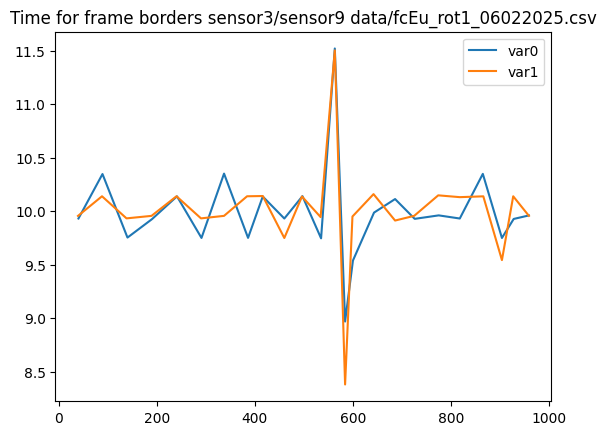

nFrames1 [39. 49. 50. 51. 51. 50. 47. 47. 32. 44. 36. 38. 29. 21. 15. 43. 44. 39.
 49. 44. 48. 38. 23. 32. 33.]
time [ 10.04437   20.000609  30.140618  40.0739    50.030547  60.170601
  70.103824  80.06054   90.200494 100.342884 110.09249  120.230514
 130.175895 141.680501 150.059832 160.010463 170.170543 180.083444
 190.040434 200.189183 210.320964 220.46044  230.003424 240.143269
 250.100347]


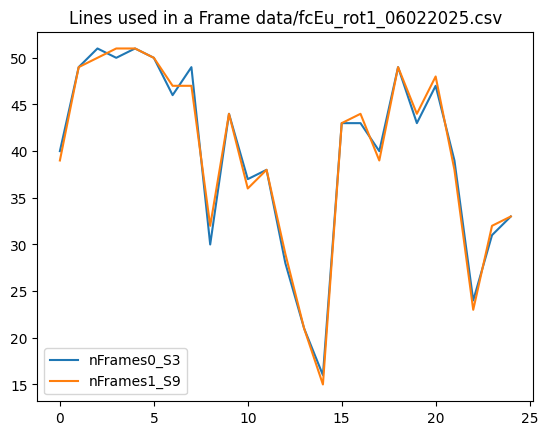

file data/fcEu_rot2_06022025.csv
experiment 1
(25, 2)
(25, 2)


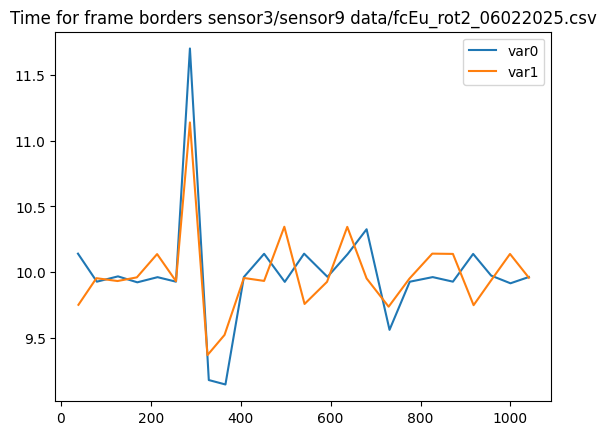

nFrames1 [39. 40. 47. 43. 45. 42. 31. 39. 38. 43. 45. 45. 45. 50. 45. 43. 49. 46.
 51. 46. 46. 38. 43. 42. 41.]
time [ 10.43165   20.183716  30.138189  40.07108   50.031814  60.169559
  70.101287  81.239977  90.609471 100.132587 110.08872  120.022437
 130.36806  140.126533 150.05337  160.39807  170.350692 180.088441
 190.03852  200.179699 210.318763 220.06804  230.001409 240.14024
 250.097933]


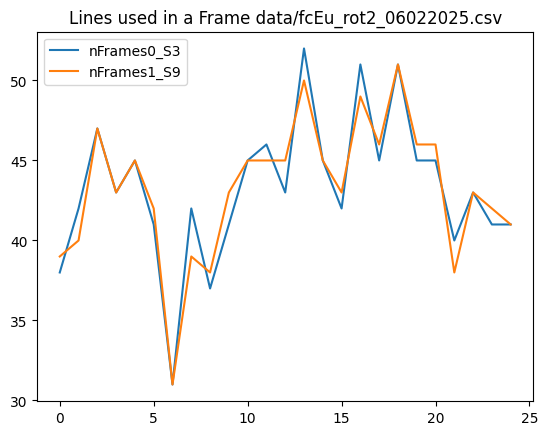

file data/fcEu_rot3_06022025.csv
experiment 2
(25, 2)
(25, 2)


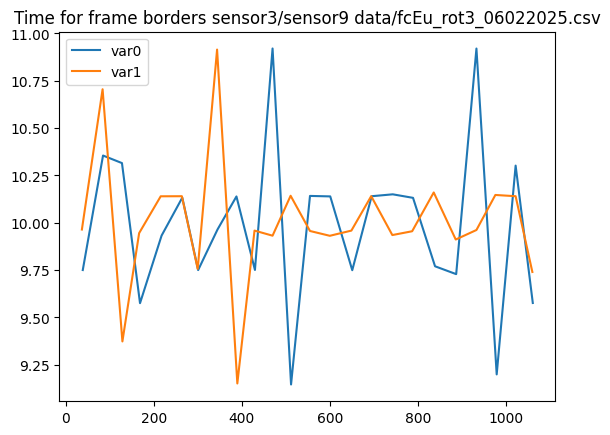

nFrames1 [37. 47. 45. 38. 49. 48. 36. 44. 46. 39. 41. 41. 44. 45. 49. 45. 48. 45.
 49. 50. 47. 43. 46. 38. 42.]
time [ 10.03733   20.00145   30.706296  40.079453  50.024596  60.164167
  70.304181  80.060561  90.97497  100.12614  110.084618 120.016198
 130.158589 140.11497  150.045952 160.004371 170.1447   180.079585
 190.034566 200.19439  210.10577  220.067333 230.213957 240.353964
 250.093926]


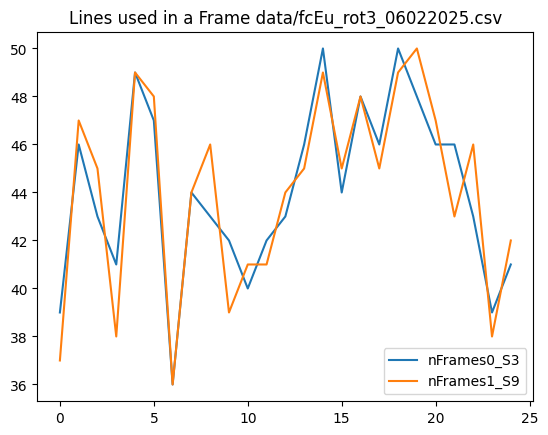

file data/fcEu_rot4_06022025.csv
experiment 3
(25, 2)
(25, 2)


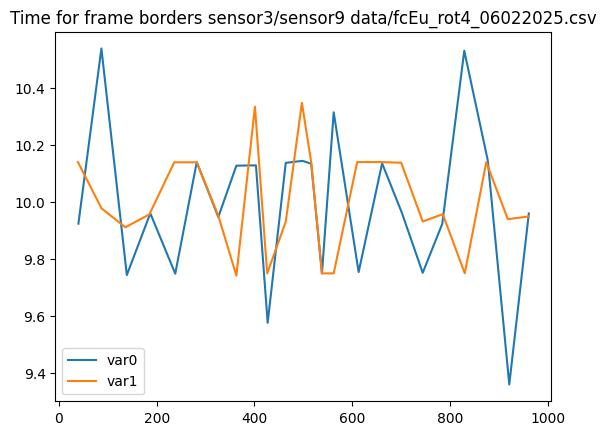

nFrames1 [39. 48. 49. 49. 51. 46. 44. 37. 38. 25. 38. 33. 19. 22. 24. 48. 50. 40.
 44. 41. 45. 44. 44. 43. 41.]
time [ 10.037272  20.178153  30.156904  40.068737  50.025713  60.165675
  70.305728  80.25849   90.00061  100.335719 110.085665 120.016974
 130.365654 140.505618 150.25559  160.005648 170.146351 180.287172
 190.425592 200.357746 210.31555  220.065936 230.206327 240.146582
 250.096443]


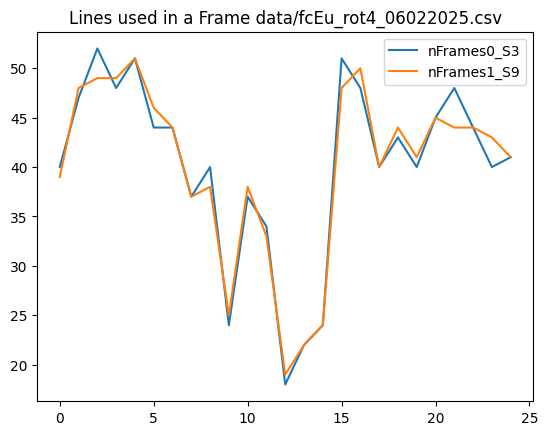

file data/fcEu_rot5_06022025.csv
experiment 4
(25, 2)
(25, 2)


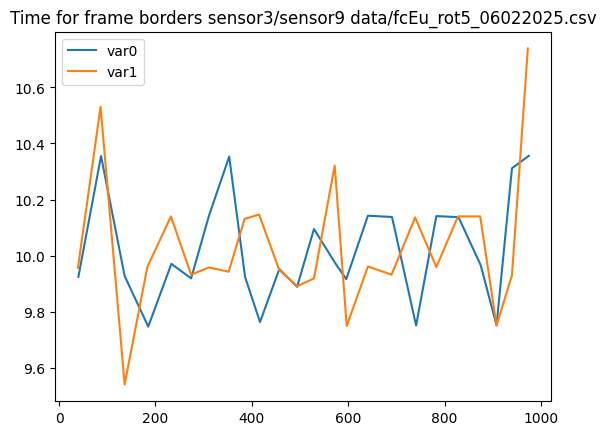

nFrames1 [39. 47. 50. 47. 49. 42. 37. 41. 33. 30. 42. 37. 35. 43. 25. 44. 49. 49.
 44. 45. 46. 34. 32. 33. 41.]
time [ 10.04776   20.004402  30.534441  40.075299  50.034364  60.174392
  70.106653  80.06476   90.007631 100.13875  110.28556  120.234339
 130.125731 140.04442  150.365611 160.114938 170.076391 180.00866
 190.144906 200.104257 210.244229 220.384209 230.135413 240.06566
 250.804239]


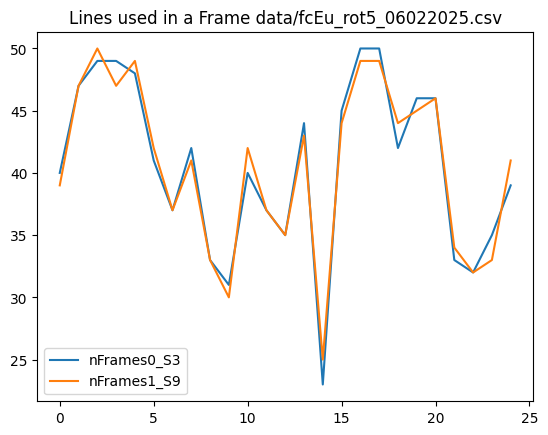

file data/fcEu_rot6_06022025.csv
experiment 5
(18, 2)
(23, 2)


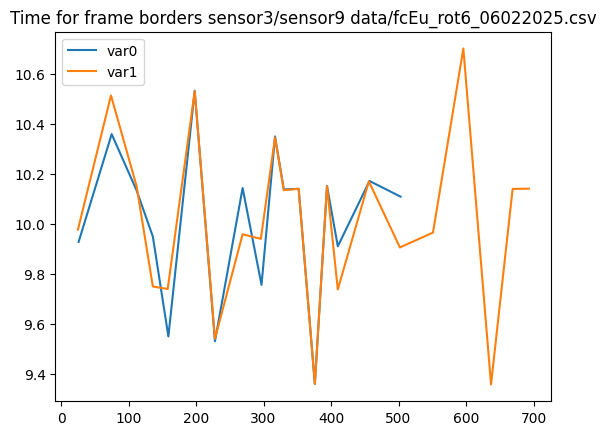

nFrames1 [25. 49. 38. 24. 22. 40. 30. 41. 27. 21. 13. 22. 24. 18. 16. 46. 46. 49.
 45. 41. 32. 24. 28.]
time [ 10.037646  20.014766  30.527501  40.677394  50.427339  60.167307
  70.697291  80.238604  90.197288 100.137446 110.482456 120.617222
 130.757269 140.118529 150.269472 160.007312 170.177212 180.083148
 190.048431 200.748983 210.10762  220.247112 230.38782 ]


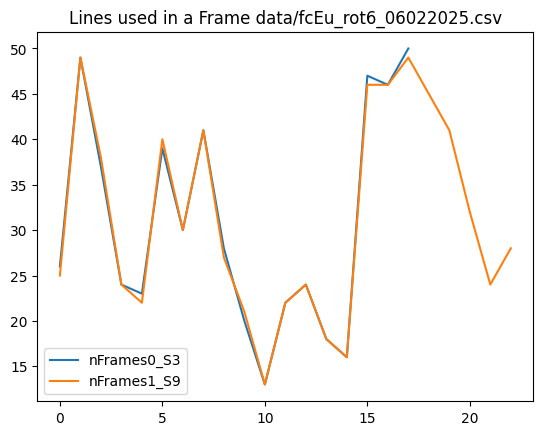

[np.float64(16.0), np.float64(15.0), np.float64(31.0), np.float64(31.0), np.float64(36.0), np.float64(36.0), np.float64(18.0), np.float64(19.0), np.float64(23.0), np.float64(25.0), np.float64(13.0), np.float64(13.0)]


In [5]:
######################################
# find 30 sec border
# Border detection by sensor!! Verify correct sensor
import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath

fMin = []
NS = 6   # Number of Sensors
NS = 4

for ex in range(6):

    if ex==0: file_in = 'cEu_rot1_06022025.csv'    
    if ex==1: file_in = 'cEu_rot2_06022025.csv'  
    if ex==2: file_in = 'cEu_rot3_06022025.csv'    
    if ex==3: file_in = 'cEu_rot4_06022025.csv'    
    if ex==4: file_in = 'cEu_rot5_06022025.csv'    
    if ex==5: file_in = 'cEu_rot6_06022025.csv'  
        
    file_in = 'data/f'+file_in
    

    t=[]
    sens = []
    with open(file_in, "r", newline='') as f_input:
        reader = csv.reader(f_input)
        lines = list(reader)
        for row in lines:
            t.append(float(row[13]))
            sens.append(row[1])


    print('file',file_in)
    print('experiment',ex)

    nImg=1
    var=[]
    bord=[]
    nearest = t[-1]
    t0=t[0::2]

    for idx, val in enumerate(t0):
        searchV = nImg*10000.
        if searchV -val < nearest:   # approximating the border
            nearest = searchV - val 
            bord=[idx, val]
            #print('Reducing nearest:',nearest, f"S1_vec('{idx}') > {val}")

        if nearest <= 0:   # getting away from th border
            #print('Augmenting nearest:',nearest, f"S1_vec('{idx}') > {val}")
    #        print('nearest',nearest)
            var.append(bord)            # Register the border (last nearest)
            nImg+=1
            nearest = t[idx+2]

    var=np.array(var)        
    print(var.shape)

    dvar=np.diff(var[:,1])
    nFrames0=np.append(var[0][0],np.diff(var[:,0]))
    
    fMin.append(np.min(nFrames0))

    plt.plot(var[:-1,0],dvar/1000,label='var0')

    #print('var',var,'dvar',dvar)

    nImg=1
    var=[]
    bord=[]
    nearest = t[-1]
    t1=t[1::2]

    for idx, val in enumerate(t1):
        searchV = nImg*10000.
        if searchV -val < nearest:   # approximating the border
            nearest = searchV - val 
            bord=[idx, val]
            #print('Reducing nearest:',nearest, f"S1_vec('{idx}') > {val}")

        if nearest <= 0:   # getting away from th border
            #print('Augmenting nearest:',nearest, f"S1_vec('{idx}') > {val}")
    #        print(idx,'nearest',nearest,val)
            var.append(bord)            # Register the border (last nearest)
            nImg+=1
            nearest = t[idx+2]

    var=np.array(var)        
    print(var.shape)        
    dvar=np.diff(var[:,1])
    nFrames1=np.append(var[0][0],np.diff(var[:,0]))
    fMin.append(np.min(nFrames1))


    plt.plot(var[:-1,0],dvar/1000,label='var1')
    plt.title('Time for frame borders sensor3/sensor9 '+file_in)
    plt.legend()
    plt.show()

    #print('idx',var[:,0])
    print('nFrames1',nFrames1)
    print('time',var[:,1]/1000)
    #print('dvar',(np.append(var[0,1],dvar)/1000))

    plt.plot(nFrames0,label='nFrames0_S3')
    plt.plot(nFrames1,label='nFrames1_S9')
    plt.title('Lines used in a Frame '+file_in)
    plt.legend()
    plt.show()
    
print(fMin)
######################################

data/fcEu_rot1_06022025.csv len(t) 2043 bords[:,0] [  79.  177.  277.  379.  481.  581.  674.  769.  832.  920.  993. 1069.
 1126. 1168. 1199. 1285. 1372. 1451. 1549. 1636. 1730. 1808. 1855. 1918.
 1984.]


ValueError: n_components=12 must be between 0 and min(n_samples, n_features)=11 with svd_solver='full'

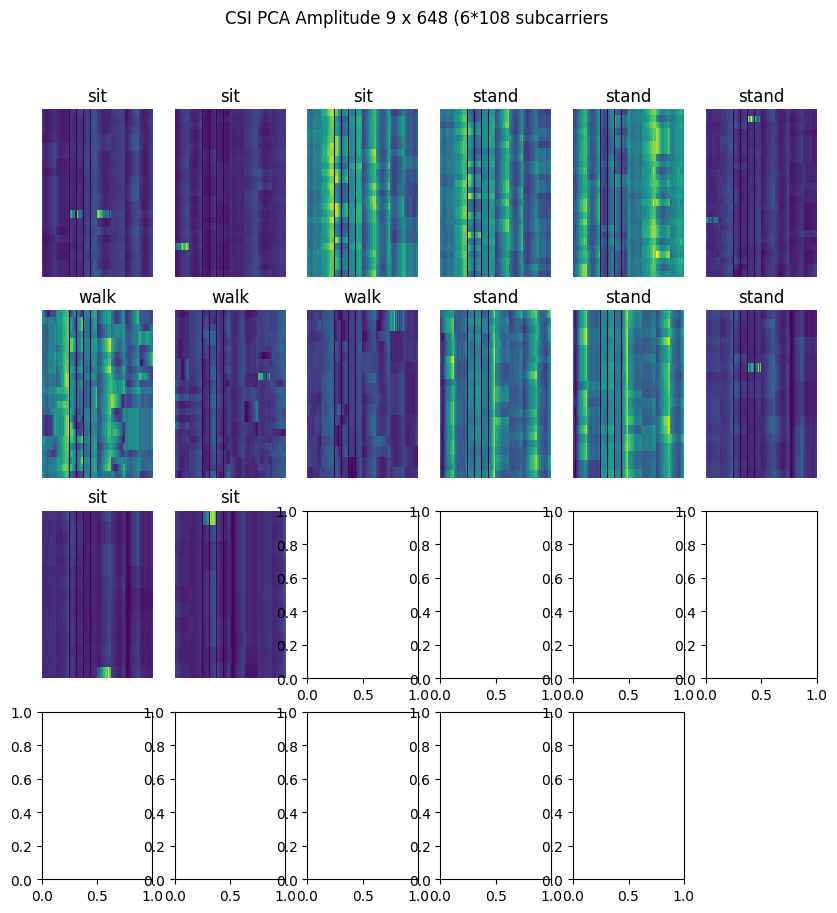

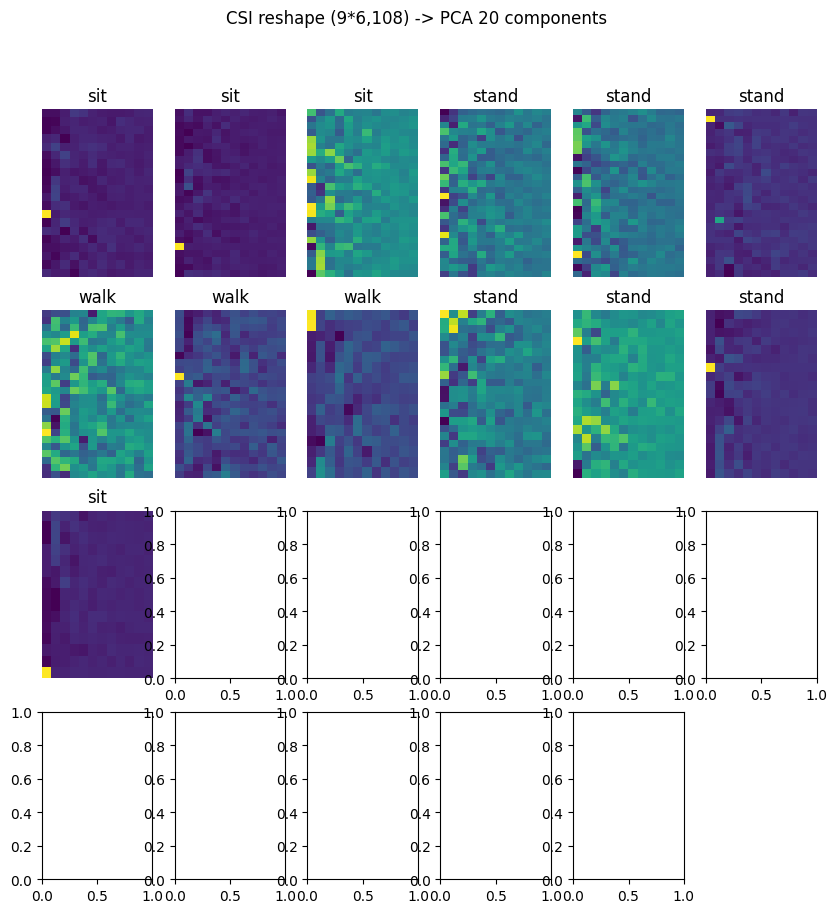

In [6]:

import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath
from PIL import Image
import glob

from sklearn.decomposition import PCA
    
pca = PCA(n_components = 12)

trainy=[]
trainx=[]
emptyTime=np.array([])

emptyTime=np.array([])
    
NFrames = 24
N10s = 52    
NS = 4   # Number of Sensors

for ex in range(6):

    if ex==0: file_in = 'cEu_rot1_06022025.csv'    
    if ex==1: file_in = 'cEu_rot2_06022025.csv'  
    if ex==2: file_in = 'cEu_rot3_06022025.csv'    
    if ex==3: file_in = 'cEu_rot4_06022025.csv'    
    if ex==4: file_in = 'cEu_rot5_06022025.csv'    
    if ex==5: file_in = 'cEu_rot6_06022025.csv'   
    
    file_in = 'data/f'+file_in
 
    t = []
    y = []
    yv= []
    ya= []
    carrier = []
    bords=[]
    nImg=1

    with open(file_in,'r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        for row in lines:
            t.append(float(row[13]))
            y.append(row[16])

    fig, axs = plt.subplots(4,6)
    fig.suptitle('CSI PCA Amplitude 9 x 648 (6*108 subcarriers')
    plt.axis('off')
    fig.set_figwidth(10)
    fig.set_figheight(10)

    fg, ax = plt.subplots(4,6)
    fg.suptitle('CSI reshape (9*6,108) -> PCA 20 components')
    plt.axis('off')
    fg.set_figwidth(10)
    fg.set_figheight(10)

######################################
# find 10 sec borders
######################################
    
    for idx, val in enumerate(t):
        searchV = nImg*10000.
        if searchV -val < nearest:      # approximating the border
            nearest = searchV - val 
            bord=[idx, val]
        if nearest <= 0:                # getting away from th border
            bords.append(bord)            # Register the border (last nearest)
            nImg+=1
            nearest = t[idx+2]
            
    bords=np.array(bords)
#    bords=np.append([0,0],bords)
    print(file_in,'len(t)',len(t),'bords[:,0]',bords[:,0] )
######################################

    for k in range (NFrames):            # Total 10 seconds frames
        CSi = []
        CSr = []
        var = []
        
        if k == 0: ini = 0
        else : ini = int(bords[k-1,0])
        pas = int(bords[k,0])
        if k < 45:
            npas= int(bords[k,0])
        
######################################
        #while t(n) in next 10s *
        for j in range (ini, pas, NS):         # One 10 seconds Frame
            cvv=[]
            for i in range(NS):            # shoul be 6 (sensor 11 is not delivering
                cvv.append([float(item) for item in y[i+j][1:-1].split(',')]) 

                   
######################################

            cv=np.array(cvv)
            cv=cv.flatten()            # 1080 CSI values => 1 line of CSI image

            ci=cv[0:len(cv):2]         # Frame Size = [N10s/Ns,(216/2 Im,Re || Amp,Pha)*NS]
            cr=cv[1:len(cv):2]

            CSi.append(ci)
            CSr.append(cr)

        emptyTime=np.append(emptyTime,t[npas]-t[j])  
        #emptyTime=emptyTime[:-1]
        #print('empty time:', t[npas]-t[j])

        imgI = np.array(CSi)
        imgR = np.array(CSr)

        aa=np.array(imgI)
        ap=np.array(imgR)
        li,co = imgI.shape

        for i in range(li):
            for c in range(co):
                # print("i,c",i,c)
                aa[i][c]=round(abs(complex(imgI[i,c],imgR[i,c])))
                ap[i][c]=round(cmath.phase(complex(imgI[i,c],imgR[i,c])))

    #    print("shape cv",cv.shape,"shape imgI",imgI.shape)

    #    k - corresponds to (50, 33, 10) cycles for NS = (1,2,6)
    #    
    #    sit    stand   walk   stand    sit    stand   walk  stand  sit
    # k: 0      3       6      9        12     15      18    21     24   27   

        if k in range(0,2) or k in range (12,14) or k in range (24,27): ttxt='sit'
        if k in range(3,5) or k in range (9,11) or k in range (15,17) or k in range (21,23): ttxt='stand'
        if k in range(6,8) or k in range (18,20): ttxt='walk'


        axs[k//6,k%6].imshow(aa, interpolation='nearest',aspect='auto')   
        axs[k//6,k%6].axis('off')
        axs[k//6,k%6].title.set_text(ttxt)

        ab=np.reshape(aa, (co,li))
        aaPCA = pca.fit_transform(aa)
        ab=np.reshape(aa, (co,li))
        
        
        aaPCA = pca.fit_transform(aa)
        
        ax[k//6,k%6].imshow(aaPCA, interpolation='nearest',aspect='auto')   
        ax[k//6,k%6].axis('off')
        ax[k//6,k%6].title.set_text(ttxt)

        trainy.append(ttxt)
        trainx.append(aaPCA)

    print('len(y)',len(y),'NS',NS,'N10s',N10s)
    print('imgI',imgI.shape,'aaPCA',aaPCA.shape)
    print('aa',aa.shape)
    # 1207601     

    #print("t(min):",277558.933/1000/60, "Lines per frame:",4201/N10s/NS)

    #print(trainy)
    print(len(trainx),len(trainx[0]),len(trainx[0][0]))
 
    plt.plot(emptyTime,label='et')
    plt.show()
    plt.show()
   
 
plt.plot(emptyTime[:-1]/1000,label='et')
plt.title('Empty Time in Frames of '+file_in)
plt.legend()
plt.xlabel('Frames')
plt.ylabel('s')
plt.show()


In [ ]:
print(len(trainx),file_in)

In [ ]:

print(7000/148)
rows = 53
cols = 4
border = [[0]*cols]*rows
border=np.array(border)
N10s = 74
    
for ex in range(6):

    if ex==0: file_in = 'cEu_rot1_06022025.csv'    
    if ex==1: file_in = 'cEu_rot2_06022025.csv'  
    if ex==2: file_in = 'cEu_rot3_06022025.csv'    
    if ex==3: file_in = 'cEu_rot4_06022025.csv'    
    if ex==4: file_in = 'cEu_rot5_06022025.csv'    
    if ex==5: file_in = 'cEu_rot6_06022025.csv'   
    
    file_ins = 'data/f'+file_in
    file_in = 'data/'+file_in
    
    t=[]
    y=[]
    with open(file_in,'r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        for row in lines:
            t.append(float(row[13]))
            y.append(row[16])

    print('file',file_in)
    print('experiment',ex)
    print(t[0:10])
    print(t[140:150])
    
    j=0
    for i in range(0,len(t),148):
        #print(i,t[i])
        border[j][ex]= t[i]
        j+=1
        
print(border[-30:])

plt.plot( border, label = ["ex","ex a","ex b","ex c"],marker = '.')
plt.xticks(rotation = 25)
plt.xlabel('t/[ms]')
plt.ylabel('t border')
plt.title('border time', fontsize = 20)
plt.legend()
plt.show()

difborde=border
for j in range(4):
    for i in range(52):
        difborde[i][j] = border[i+1][j] - border[i][j]

difborde=difborde[:-1]*.001 
    
plt.plot( difborde[0:6], label = ["ex","ex a","ex b","ex c"],marker='.')
plt.xticks(rotation = 25)
plt.xlabel('t/[s]')
plt.ylabel('t border')
plt.title('border time', fontsize = 20)
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath
from PIL import Image
import glob

from sklearn.decomposition import PCA
    
pca = PCA(n_components = 15)


x = []
y = []
yv= []
ya= []
carrier = []
trainy=[]
trainx=[]

fig, axs = plt.subplots(2,4)
fig.suptitle('1st CSI from Frames[0:4]')
plt.axis('off')
fig.set_figwidth(20)
fig.set_figheight(10)  

with open(file_in,'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(float(row[13]))
        y.append(row[16])

    for k in range (4):            # Total 10 seconds frames
        CSi = []
        CSr = []
        
        #while t(n) < 10s *
        for j in range (N10s*k,N10s*(k+1),NS):         # One 10 seconds Frame
            cvv=[]
            for i in range(NS):            # shoul be 6 (sensor 11 is not delivering
                cvv.append([float(item) for item in y[i+j][1:-1].split(',')])

            cv=np.array(cvv)
            cv=cv.flatten()            # 1080 CSI values => 1 line of CSI image

            ci=cv[0:len(cv):2]         # Frame Size = [N10s/Ns,(216/2 Im,Re || Amp,Pha)*NS]
            cr=cv[1:len(cv):2]

            #ci = ci[ci != 0]  # remove '0' -> guard subcarriers
            #cr = cr[cr != 0]  # remove '0' -> guard subcarriers
            
            CSi.append(ci)
            CSr.append(cr)
        
        ##################################

        imgI = np.array(CSi)
        imgR = np.array(CSr)
        aa=np.array(imgI)
        ap=np.array(imgR)
        li,co = imgI.shape

        for i in range(li):
            for c in range(co):
                # print("i,c",i,c)
                aa[i][c]=abs(complex(imgI[i,c],imgR[i,c]))
                ap[i][c]=cmath.phase(complex(imgI[i,c],imgR[i,c]))
         ######################################

        imgp=np.array(ci)
        realp=np.array(cr)

        ###################################

        imgp=np.array(aa)
        realp=np.array(ap)

        im=np.reshape(imgp[0][0:54],(54,1))
        print(im.shape,imgp.shape,realp.shape)
        axs[0,k].plot( np.transpose(imgp[0:4][0:54]),  label = ['0','1','2','3']) 
        axs[0,k].legend()
        axs[0,k].title.set_text('|CSI|')
        #axs[0,k].axis('off')
        axs[1,k].plot( np.transpose(realp[0:4][0:54]), label = ['0','1','2','3']) 
        axs[1,k].legend()
        axs[1,k].title.set_text('/CSI')
        #axs[1,k].axis('off')
        #axs[k//2,k%2].axis('off')
        #print('img',imgp)
        #print('real',realp)


In [ ]:
#import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2)
fig.suptitle('CSI')
axs[0,0].imshow(imgI, interpolation='nearest',aspect='auto')
axs[0,0].title.set_text('Im')
axs[0,1].imshow(imgR, interpolation='nearest',aspect='auto')
axs[0,1].title.set_text('Re')

axs[1,0].imshow(aa, interpolation='nearest',aspect='auto')
axs[1,0].title.set_text('Amplitude')
axs[1,1].imshow(ap, interpolation='nearest',aspect='auto')
axs[1,1].title.set_text('Phase')

plt.figure()
plt.imshow(aaPCA, interpolation='nearest',aspect='auto')
print(aaPCA.shape)
plt.title('34 components'+file_in)
plt.legend()
plt.show()





In [ ]:
from mpl_toolkits.mplot3d import axes3d
import scipy.misc
import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath
from PIL import Image
import glob
from sklearn.decomposition import PCA
    
pca = PCA(n_components = 10)
#fig, axs = plt.subplots(4,3)

x = []
y = []
yv= []
ya= []

with open(file_in,'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(float(row[13]))
        y.append(row[16])
    
#for k in range (NFrames):            # Total 10 seconds frames
for k in range (3*4):            # Total 10 seconds frames
    CSi = []
    CSr = []
    for j in range (N10s*k,N10s*(k+1),NS):         # One 10 seconds Frame
        cvv=[]
        for i in range(NS):            # shoul be 6 (sensor 11 is not delivering
            cvv.append([float(item) for item in y[i+j][1:-1].split(',')])

        cv=np.array(cvv)
        cv=cv.flatten()            # 1080 CSI values => 1 line of CSI image

        ci=cv[0:len(cv):2]         # Frame Size = [N10s/Ns,(216/2 Im,Re || Amp,Pha)*NS]
        cr=cv[1:len(cv):2]

        CSi.append(ci)
        CSr.append(cr)

    imgI = np.array(CSi)
    imgR = np.array(CSr)

    aa=np.array(imgI)
    ap=np.array(imgR)
    li,co = imgI.shape

    for i in range(li):
        for c in range(co):
            # print("i,c",i,c)
            aa[i][c]=round(abs(complex(imgI[i,c],imgR[i,c])))
            ap[i][c]=round(cmath.phase(complex(imgI[i,c],imgR[i,c])))
 
#    print("shape cv",cv.shape,"shape imgI",imgI.shape)
   
#    k - corresponds to (50, 33, 10) cycles for NS = (1,2,6)
#    
#    sit    stand   walk   stand    sit    stand   walk  stand  sit
# k: 0      3       6      9        12     15      18    21     24   27   
         
    if k in range(0,2) or k in range (12,14) or k in range (24,27): ttxt='sit'
    if k in range(3,5) or k in range (9,11) or k in range (15,17) or k in range (21,23): ttxt='stand'
    if k in range(6,8) or k in range (18,20): ttxt='walk'
   
    
    ab=np.reshape(aa, (co,li))
    aaPCA = pca.fit_transform(aa)
    
    #print(aa.shape,aaPCA.shape)
    
    # create the x and y coordinate arrays (here we just use pixel indices)
    xx, yy = np.mgrid[0:aa.shape[0], 0:aa.shape[1]]

    # create the figure
    fig = plt.figure()
#    fig.title('CSI Surface')
     
    fig.suptitle('CSI Image, 3D-Surface '+str(k)+'/'+str(12)+', Activity: '+ttxt)

#    axs[k//6,k%6] = fig.gca(projection='3d')
#    axs[k//6,k%6] = fig.add_subplot(projection='3d')
#    axs[k//6,k%6].plot_surface(xx, yy, aa ,rstride=1, cstride=1, cmap=plt.cm.Oranges,
#            linewidth=0)
    axs[k//3,k%3] = fig.add_subplot(projection='3d')
    axs[k//3,k%3].plot_surface(xx, yy, aa ,rstride=1, cstride=1, cmap=plt.cm.Oranges,
            linewidth=0)

    # show it
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d

import scipy.misc
# downscaling has a "smoothing" effect
#aa = scipy.misc.imresize(aa, 0.15, interp='cubic')

print(aa.shape[0],aa.shape[1])
                              
#aa=np.array(aa)
# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:aa.shape[0], 0:aa.shape[1]]

# create the figure
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, aa ,rstride=1, cstride=1, cmap=plt.cm.Oranges,
        linewidth=0)

# show it
plt.show()

In [ ]:
#cv = cv[0:216]    # remove 'end of frame' from data[]
cv = cv[cv != 0]  # remove '0' -> guard subcarriers


cv=cv[:-1]
print(cv.size)

#plt.plot( cv[0::2], color = 'g', linestyle = 'dashed', marker = '.',label = "Im")
#plt.plot( cv[1::2], color = 'r', linestyle = 'dashed', marker = '.',label = "Re")  
print(imgI.size)

plt.plot( imgI[0:6].transpose(),label=['0','1','2','3','4','5'])

plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Im', fontsize = 20)
plt.legend()
plt.show()

plt.plot( imgR[0:6].transpose(),label=['0','1','2','3','4','5'])  
plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Re', fontsize = 20)
plt.legend()
plt.show()

aa=[]
ap=[]
for i in range(0,cv.size,2):
    aa.append(abs(complex(cv[i],cv[i+1])))
    ap.append(cmath.phase(complex(cv[i],cv[i+1])))

aaM=np.array(aa)
apM=np.array(ap)
print('aaM.shape',aaM.shape)


plt.plot( aaM, label = "abs(CSI)")
plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Abs', fontsize = 20)
plt.legend()
plt.show()

plt.plot( apM, label = "phase(CSI)")
plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Phase', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# Initial consistency check of .csv files 
import matplotlib.pyplot as plt
import itertools
import csv
import os
import pandas
import numpy as np
import math
import cmath


lent=[]
tmin=[]
tsamp=[]

NS = 6
N10s = 74

NS = 2   # Number of Sensors
N10s = 158

for ex in range(2):

    if ex==0: file_in = 'c+leandro_26abr_241_lara.csv'   
    if ex==1: file_in = '3fevIVb221_5_10.csv'  
  
    file_out = 'data/f'+file_in
    file_in = 'data/'+file_in

    # Assumes first 6 lines are correct. Further missing Lines: Will copy from last valid CSI 

    t=[]
    sens = []
    dt = []
    tin = []
    with open(file_in, "r", newline='') as f_input:
        reader = csv.reader(f_input)
        lines = list(reader)
        for row in lines:
            sens.append(row[1])
            t.append(float(row[13]))
            dt.append(float(row[14]))
            tin.append(float(row[15]))

    t=np.array(t)
    dt=np.array(dt)            
    print('\nOutlyers in',file_in,'len(t):',len(t),'{:.3f} ms'.format(t[len(t)-1]),'tmax/len:{:.3f} ms;'.format(t[len(t)-1]/len(t)), 
          'mean(dt) {:.3f} ms;'.format(np.mean(dt)),'min/max(dt)','{:.3f};'.format(np.min(dt)),'{:.3f};'.format(np.max(dt)))             
    
    #print('CSI\t dt_rxM\t    sensor\t time')
    #for i in range(len(t)):            
    #    if dt[i] > 135:
    #        print(i, '\t{:.3f} ms;\t'.format(dt[i]), sens[i], '\t{:.3f} ms;'.format(t[i]))

    print('CSI\t tin_cycle\t sensor \ttime  \tdt  \tmax(tin):',np.max(tin),'min(tin):',np.min(tin))
    for i in range(len(t)):            
        # if tin[i] > 215:  #NS=2
        if tin[i] > 523:    #NS=6
            print(i, '\t{:.3f} ms;\t'.format(tin[i]), sens[i], '\t{:.3f} ms;'.format(t[i]),'\t{:.3f} ms;'.format(dt[i]))

#cv = cv[0:216]    # remove 'end of frame' from data[]
#cv = cv[cv != 0]  # remove '0' -> guard subcarriers


#cv=cv[:-1]
#print(cv.size)

#plt.plot( cv[0::2], color = 'g', linestyle = 'dashed', marker = '.',label = "Im")
#plt.plot( cv[1::2], color = 'r', linestyle = 'dashed', marker = '.',label = "Re")  
print(imgI.size)

plt.plot( imgI[0:6].transpose(),label=['0','1','2','3','4','5'])

plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Im', fontsize = 20)
plt.legend()
plt.show()

plt.plot( imgR[0:6].transpose(),label=['0','1','2','3','4','5'])  
plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Re', fontsize = 20)
plt.legend()
plt.show()

aa=[]
ap=[]
for i in range(0,cv.size,2):
    aa.append(abs(complex(cv[i],cv[i+1])))
    ap.append(cmath.phase(complex(cv[i],cv[i+1])))

aaM=np.array(aa)
apM=np.array(ap)
print('aaM.shape',aaM.shape)


plt.plot( aaM, label = "abs(CSI)")
plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Abs', fontsize = 20)
plt.legend()
plt.show()

plt.plot( apM, label = "phase(CSI)")
plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition Phase', fontsize = 20)
plt.legend()
plt.show()